<a href="https://colab.research.google.com/github/AhmadFajarRF/CLEAN-DATA-GlobalYouTubeStatistics2023/blob/main/filterGYS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#file yang digunakaan terlebih dahulu harus di encoding
#kode ini untuk encoding secara otomatis
import chardet

with open("/content/GYS.csv", "rb") as f:
    result = chardet.detect(f.read())

In [ ]:
df = pd.read_csv("/content/GYS.csv", encoding=result['encoding'])

# explorasi dan clening data


In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
#cek nilai nan
print(df.isna().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title', 'uploads', 'Country', 'Abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_month', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


In [ ]:
# Daftar nama kolom yang ingin dihapus
columns_to_delete = ["created_year","created_month","created_date","Gross tertiary education enrollment (%)","Population","Unemployment rate","Urban_population","Latitude","Longitude"]

# Hapus kolom yang ingin dihapus
df_new = df.drop(columns=columns_to_delete)

# Lakukan analisis lebih lanjut dengan df_cleaned
# Replace NaN values with "Other"
df_new['category'] = df_new['category'].fillna('Other')

# Replace NaN values with "Other"
df_new['Country'] = df_new['Country'].fillna('Other')

# Simpan DataFrame baru ke file CSV jika diperlukan
GYSnew = "/content/cleaned_data.csv"
df_new.to_csv(GYSnew, index=False)

print("Kolom dihapus dari dataset CSV!")

Kolom dihapus dari dataset CSV!


In [ ]:
#cek nilai nan
print(df_new.isna().sum())

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                              0
Title                                 0
uploads                               0
Country                               0
Abbreviation                        122
channel_type                         30
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
subscribers_for_last_30_days        337
dtype: int64


In [ ]:
# Filter baris dengan nilai NaN pada kolom "kategori"
df_Cnan = df_new[df_new["category"].isna()]

In [ ]:
# Tampilkan hasil filter
df_Cnan

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.00,0.00,0.00,0.000000e+00,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.00,0.00,0.00,0.000000e+00,NaN
18,19,Sports,75000000,0.000000e+00,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,1.600000e+01,0.00,0.06,0.05,7.700000e-01,NaN
91,92,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,NaN,Vlad vï¿½ï¿½ï,515,United States,US,Entertainment,84.0,28.0,27.0,2.440930e+08,61000.00,976400.00,732300.00,1.170000e+07,200000.0
102,103,News,36300000,0.000000e+00,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.00,0.00,0.00,0.000000e+00,NaN
132,133,BETER Bï¿½ï¿½,32700000,1.918004e+10,NaN,BETER Bï¿½ï¿½,2738,Turkey,TR,Games,137.0,1.0,11.0,1.463000e+09,365900.00,5900000.00,4400000.00,7.020000e+07,2100000.0
155,156,Diana and Roma ESP,30700000,1.235599e+10,NaN,Diana and Roma ESP,578,United States,US,Entertainment,313.0,45.0,45.0,1.029980e+08,25700.00,412000.00,309000.00,4.900000e+06,200000.0
161,162,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,30400000,1.799996e+10,NaN,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,532,United States,US,Entertainment,147.0,46.0,46.0,1.229260e+08,30700.00,491700.00,368800.00,5.900000e+06,300000.0
173,174,Popular on YouTube,29300000,0.000000e+00,NaN,Popular on Youtube,3,NaN,NaN,Education,4019724.0,NaN,4847.0,1.000000e+00,0.00,0.00,0.00,5.000000e-02,NaN
214,215,D Billions,26200000,3.197746e+10,NaN,D Billions,775,United States,US,Entertainment,33.0,64.0,58.0,4.870760e+08,121800.00,1900000.00,1500000.00,2.340000e+07,200000.0



#CATEGORY
Filter and visualization

In [ ]:
import plotly.express as px
# Group the data by category and sum the video views
df_cv = df_new.groupby("category")["video views"].sum().reset_index()

# Create a bar chart
fig = px.bar(df_cv, x="category", y="video views", title="Video Views by Category")

# Make the chart interactive
fig.update_layout(hovermode="closest")

# Show the plot
fig.show()

In [ ]:
# Filter the data by category
df_ycm = df_new[df_new["category"] == "Music"]

# Group the data by YouTuber
df_ycm = df.groupby("Youtuber")["video views"].sum()

# Sort the data by video views
df_ycm = df_ycm.sort_values(ascending=False)

# Get the top 10 YouTubers
top_10_youtubers = df_ycm.head(10)



In [ ]:
# Print the top 10 YouTubers
print(top_10_youtubers)

Youtuber
T-Series                      2.280000e+11
Cocomelon - Nursery Rhymes    1.640000e+11
SET India                     1.480000e+11
Sony SAB                      1.010000e+11
ýýý Kids Diana Show           9.324704e+10
Like Nastya                   9.047906e+10
WWE                           7.742847e+10
Vlad and Niki                 7.718017e+10
Zee TV                        7.313905e+10
Colors TV                     6.151091e+10
Name: video views, dtype: float64


# Youtuber, views, country
filter and visualization

In [ ]:
# Sort the data by subscribers_for_last_30_days
df_top10youtuber = df_new.sort_values("subscribers_for_last_30_days", ascending=False)

# Get the top 10 YouTubers
top_sub = df_top10youtuber.head(10)

# Select only the columns "youtuber", "category", and "subscribers_for_last_30_days"
top_sub = top_sub[["Youtuber", "category", "subscribers_for_last_30_days","Country"]]


In [ ]:
# Print the top 10 YouTubers
top_sub

,Youtuber,category,subscribers_for_last_30_days,Country
2,MrBeast,Entertainment,8000000.0,United States
417,DaFuq!?Boom!,Film & Animation,6700000.0,United States
117,Jess No Limit,Entertainment,5500000.0,Indonesia
483,BeatboxJCOP,Film & Animation,3400000.0,NaN
332,ZAMZAM ELECTRONICS TRADING,NaN,3400000.0,United Arab Emirates
495,ýýýýýýýýý KIMPRO,NaN,3200000.0,South Korea
302,KL BRO Biju Rithvik,Entertainment,3200000.0,NaN
598,Panda Shorts,NaN,3000000.0,Sweden
132,BETER Bï¿½ï¿½,NaN,2100000.0,Turkey
0,T-Series,Music,2000000.0,India


In [ ]:
# Sort the data by population
df_topcountry = df.sort_values("Population", ascending=False)

# Print the top 10 countries
top_countries = df_topcountry.head()
top_countries = top_countries[["Country", "Population"]]
# Drop duplicate countries
top_countries = top_countries.drop_duplicates()

In [ ]:
# Print the top 10 countries
top_countries

,Country,Population
507,China,1.397715e+09
0,India,1.366418e+09


In [ ]:
# Sort the data by subscribers_for_last_30_days
df_yv = df.sort_values("video views", ascending=False)

# Get the top 10 YouTubers
top_views = df_yv

# Select only the columns "youtuber", "category", and "subscribers_for_last_30_days"
top_views = top_views[["Youtuber", "category","Country","video views","Population","Unemployment rate"]]


In [ ]:
top_views.head()

,Youtuber,category,Country,video views,Population,Unemployment rate
0,T-Series,Music,India,2.280000e+11,1.366418e+09,5.36
3,Cocomelon - Nursery Rhymes,Education,United States,1.640000e+11,3.282395e+08,14.70
4,SET India,Shows,India,1.480000e+11,1.366418e+09,5.36
15,Sony SAB,Shows,India,1.010000e+11,1.366418e+09,5.36
6,ýýý Kids Diana Show,People & Blogs,United States,9.324704e+10,3.282395e+08,14.70


In [ ]:
# Sort the data by subscribers_for_last_30_days
df_popu = df.sort_values("video views", ascending=False)

# Get the top 10 YouTubers
top_popu = df_popu

# Select only the columns "youtuber", "category", and "subscribers_for_last_30_days"
top_popu = top_popu[["Youtuber", "category","Country","video views","Population","Unemployment rate"]]

In [ ]:
top_popu.head()

,Youtuber,category,Country,video views,Population,Unemployment rate
0,T-Series,Music,India,2.280000e+11,1.366418e+09,5.36
3,Cocomelon - Nursery Rhymes,Education,United States,1.640000e+11,3.282395e+08,14.70
4,SET India,Shows,India,1.480000e+11,1.366418e+09,5.36
15,Sony SAB,Shows,India,1.010000e+11,1.366418e+09,5.36
6,ýýý Kids Diana Show,People & Blogs,United States,9.324704e+10,3.282395e+08,14.70


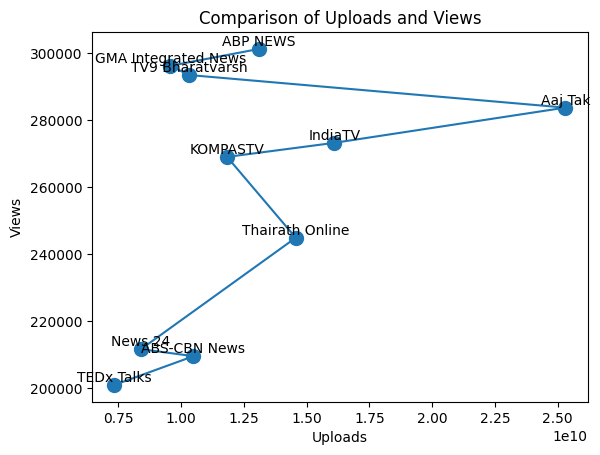

<Figure size 4000x2000 with 0 Axes>

In [ ]:
# Sort the data by views in descending order
df.sort_values(by='uploads', ascending=False, inplace=True)

# Get the top 10 views
top_10_views = df.head(10)

# Create the line chart
plt.plot(top_10_views['video views'], top_10_views['uploads'], marker='o', markersize=10, linestyle='-')

# Set the title and labels
plt.title('Comparison of Uploads and Views')
plt.xlabel('Uploads')
plt.ylabel('Views')

# Add the name of the YouTuber to each point
for i, row in top_10_views.iterrows():
    plt.text(row['video views'], row['uploads'], row['Youtuber'], ha='center', va='bottom')
# Change the size of the plot
plt.figure(figsize=(40, 20))
# Show the plot
plt.show()

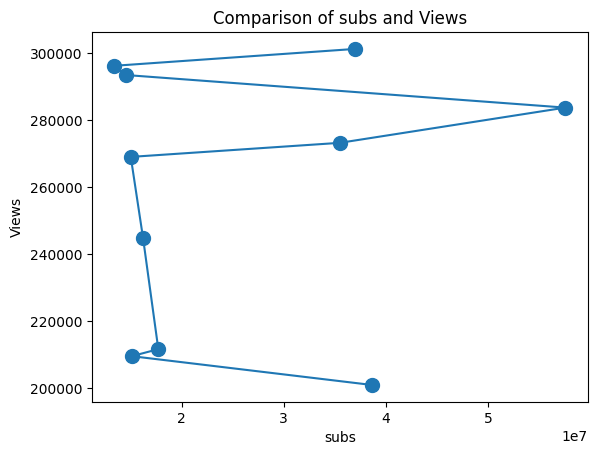

<Figure size 4000x2000 with 0 Axes>

In [ ]:
# Sort the data by views in descending order
df.sort_values(by='uploads', ascending=False, inplace=True)

# Get the top 10 views
top_10_views = df.head(10)

# Create the line chart
plt.plot(top_10_views['subscribers'], top_10_views['uploads'], marker='o', markersize=10, linestyle='-')

# Set the title and labels
plt.title('Comparison of subs and Views')
plt.xlabel('subs')
plt.ylabel('Views')


# Change the size of the plot
plt.figure(figsize=(40, 20))
# Show the plot
plt.show()

# Pendapatan, new fill in colom category
filter and visualization

In [ ]:
# Sort the data by highest_monthly_earnings
df_pendapatan = df.sort_values("highest_yearly_earnings", ascending=False)

# Get the top 10 YouTubers
top_pendapatan_youtubers = df_pendapatan
top_pendapatan_youtubers = top_pendapatan_youtubers[["Youtuber", "category","Country","video views","highest_monthly_earnings","highest_yearly_earnings"]]


In [ ]:
# Print the top 10 YouTubers
top_pendapatan_youtubers.head()

,Youtuber,category,Country,video views,highest_monthly_earnings,highest_yearly_earnings
495,ýýýýýýýýý KIMPRO,NaN,South Korea,1.920670e+10,13600000.0,163400000.0
417,DaFuq!?Boom!,Film & Animation,United States,7.906182e+09,9200000.0,110600000.0
0,T-Series,Music,India,2.280000e+11,9000000.0,108400000.0
302,KL BRO Biju Rithvik,Entertainment,NaN,1.798835e+10,8100000.0,97600000.0
3,Cocomelon - Nursery Rhymes,Education,United States,1.640000e+11,7900000.0,94800000.0


In [ ]:
# Create a new column called `nan_category`

df_new['category'] = df_new['category'].fillna('Other')
# Group the data by category
df_by_category = df_new.groupby("category")["video views"].sum().reset_index()
# Replace NaN values with "Other"

# Create a bar chart
figg = px.bar(df_by_category, x="category", y="video views", title="Video Views by Category")

# Make the chart interactive
figg.update_layout(hovermode="closest")

# Show the plot
figg.show()

# free

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              995 non-null    int64  
 1   Youtuber                          995 non-null    object 
 2   subscribers                       995 non-null    int64  
 3   video views                       995 non-null    float64
 4   category                          995 non-null    object 
 5   Title                             995 non-null    object 
 6   uploads                           995 non-null    int64  
 7   Country                           873 non-null    object 
 8   Abbreviation                      873 non-null    object 
 9   channel_type                      965 non-null    object 
 10  video_views_rank                  994 non-null    float64
 11  country_rank                      879 non-null    float64
 12  channel_

In [ ]:
print(df_new.isna().sum())

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                              0
Title                                 0
uploads                               0
Country                             122
Abbreviation                        122
channel_type                         30
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
subscribers_for_last_30_days        337
dtype: int64


In [ ]:
print(df.isna().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# metode regresi linier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['subscribers'].values.reshape(-1, 1), df['video views'].values, test_size=0.25)
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)

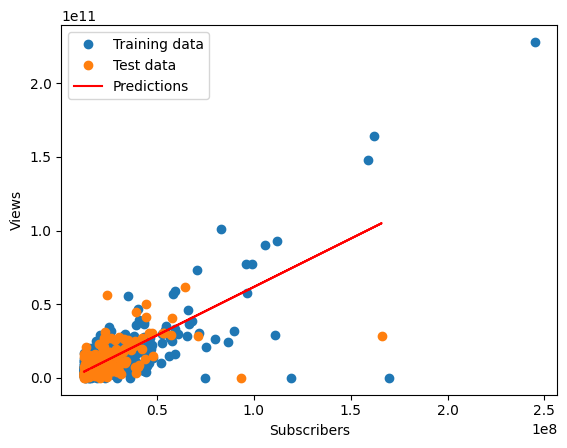

0.062410625868238534


In [ ]:
# Plot the data and the predictions
plt.plot(X_train, y_train, 'o', label='Training data')
plt.plot(X_test, y_test, 'o', label='Test data')
plt.plot(X_test, predictions, 'r-', label='Predictions')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.legend()
plt.show()

print(score)

# MERUBAH SEMUA NILAI NAN MENJADI OTHER

In [ ]:

# Replace NaN values with "Other"
df_new['Country'] = df_new['Country'].fillna('Other')


In [ ]:
# Replace NaN values with "Other"
df_new['channel_type'] = df_new['channel_type'].fillna('Other')


In [ ]:
print(df_new.isna().sum())

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                              0
Title                                 0
uploads                               0
Country                               0
Abbreviation                        122
channel_type                          0
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
subscribers_for_last_30_days        337
dtype: int64
